#### 1. srtm dem downloading; 
#### 2. srtm dem processing, including dem mosaic and downsampling.


In [4]:
import matplotlib.pyplot as plt
from pyrsimg import readTiff
import geopandas as gpd
from glob import glob
from utils.get_dem import get_dem


In [5]:
path_vec_hma = 'extents/HMA/hma_bolch2019_fill.gpkg'
geodf_vec_hma = gpd.read_file(path_vec_hma)
geodf_vec_hma


,himap_region,geometry
0,NaN,"MULTIPOLYGON (((80.84126 44.21778, 80.84031 44..."


### **Download SRTM DEM**


In [6]:
# hma_bounds = ([75, 76, 34, 35])  ### west, east, south, north
lonmin, lonmax = 60, 110
latmin, latmax = 20, 50
for lon in range(lonmin, lonmax, 5):    
    for lat in range(latmin, latmax, 5):        
        dem_out = 'dem/tiles/SRTMGL3_{}_{}.tif'.format(lon, lat)
        region = [lon-0.1, lon+5+0.1, lat-0.1, lat+5+0.1]
        print('Ouput dem:', dem_out, 'Region:',  region)
        # get_dem(demtype='SRTMGL3', bounds=region, path_out=dem_out)


Ouput dem: dem/tiles/SRTMGL3_60_20.tif Region: [59.9, 65.1, 19.9, 25.1]
Ouput dem: dem/tiles/SRTMGL3_60_25.tif Region: [59.9, 65.1, 24.9, 30.1]
Ouput dem: dem/tiles/SRTMGL3_60_30.tif Region: [59.9, 65.1, 29.9, 35.1]
Ouput dem: dem/tiles/SRTMGL3_60_35.tif Region: [59.9, 65.1, 34.9, 40.1]
Ouput dem: dem/tiles/SRTMGL3_60_40.tif Region: [59.9, 65.1, 39.9, 45.1]
Ouput dem: dem/tiles/SRTMGL3_60_45.tif Region: [59.9, 65.1, 44.9, 50.1]
Ouput dem: dem/tiles/SRTMGL3_65_20.tif Region: [64.9, 70.1, 19.9, 25.1]
Ouput dem: dem/tiles/SRTMGL3_65_25.tif Region: [64.9, 70.1, 24.9, 30.1]
Ouput dem: dem/tiles/SRTMGL3_65_30.tif Region: [64.9, 70.1, 29.9, 35.1]
Ouput dem: dem/tiles/SRTMGL3_65_35.tif Region: [64.9, 70.1, 34.9, 40.1]
Ouput dem: dem/tiles/SRTMGL3_65_40.tif Region: [64.9, 70.1, 39.9, 45.1]
Ouput dem: dem/tiles/SRTMGL3_65_45.tif Region: [64.9, 70.1, 44.9, 50.1]
Ouput dem: dem/tiles/SRTMGL3_70_20.tif Region: [69.9, 75.1, 19.9, 25.1]
Ouput dem: dem/tiles/SRTMGL3_70_25.tif Region: [69.9, 75.1, 24.9

### Mosaic

In [7]:
paths_dem_ls = glob('dem/tiles/*')
paths_dem_str = ''
for path in paths_dem_ls:
    paths_dem_str = paths_dem_str + path + ' '
print(paths_dem_str)



dem/tiles/SRTMGL3_90_40.tif dem/tiles/SRTMGL3_80_45.tif dem/tiles/SRTMGL3_100_30.tif dem/tiles/SRTMGL3_65_20.tif dem/tiles/SRTMGL3_75_25.tif dem/tiles/SRTMGL3_75_30.tif dem/tiles/SRTMGL3_65_35.tif dem/tiles/SRTMGL3_100_25.tif dem/tiles/SRTMGL3_100_35.tif dem/tiles/SRTMGL3_65_25.tif dem/tiles/SRTMGL3_75_20.tif dem/tiles/SRTMGL3_75_35.tif dem/tiles/SRTMGL3_65_30.tif dem/tiles/SRTMGL3_100_20.tif dem/tiles/SRTMGL3_90_45.tif dem/tiles/SRTMGL3_80_40.tif dem/tiles/SRTMGL3_65_40.tif dem/tiles/SRTMGL3_75_45.tif dem/tiles/SRTMGL3_100_45.tif dem/tiles/SRTMGL3_80_30.tif dem/tiles/SRTMGL3_90_35.tif dem/tiles/SRTMGL3_90_20.tif dem/tiles/SRTMGL3_80_25.tif dem/tiles/SRTMGL3_80_35.tif dem/tiles/SRTMGL3_90_30.tif dem/tiles/SRTMGL3_90_25.tif dem/tiles/SRTMGL3_80_20.tif dem/tiles/SRTMGL3_65_45.tif dem/tiles/SRTMGL3_75_40.tif dem/tiles/SRTMGL3_100_40.tif dem/tiles/SRTMGL3_70_40.tif dem/tiles/SRTMGL3_60_45.tif dem/tiles/SRTMGL3_105_40.tif dem/tiles/SRTMGL3_95_30.tif dem/tiles/SRTMGL3_85_35.tif dem/tiles/SRT

In [9]:
paths_dem_ls = glob('dem/tiles/*')
out_file = 'dem/hma_SRTMGL3.tif'
!gdal_merge.py -init 0 -co BIGTIFF=YES -o $out_file $paths_dem_str


0...10...20...30...40...50...60...70...80...90...100 - done.


### Downsampling

In [10]:
# # ## downsampling
path_srtm = 'dem/hma_SRTMGL3.tif'
path_srtm_down = 'dem/hma_SRTMGL3_down.tif' 
!gdal_translate -outsize 30% 30% -r average $path_srtm $path_srtm_down


Input file size is 60240, 36240
0...10...20...30...40...50...60...70...80...90...100 - done.


### Dem transform
#### Shaded relief map


In [11]:
## Generate a shaded relief map 
path_dem_shade_relif = 'dem/hma_srtmgl3_down_shade_relif.tif'
path_dem = 'dem/hma_SRTMGL3_down.tif'
!gdaldem hillshade $path_dem $path_dem_shade_relif



0...10...20...30...40...50...60...70...80...90...100 - done.


### Check the dem image.

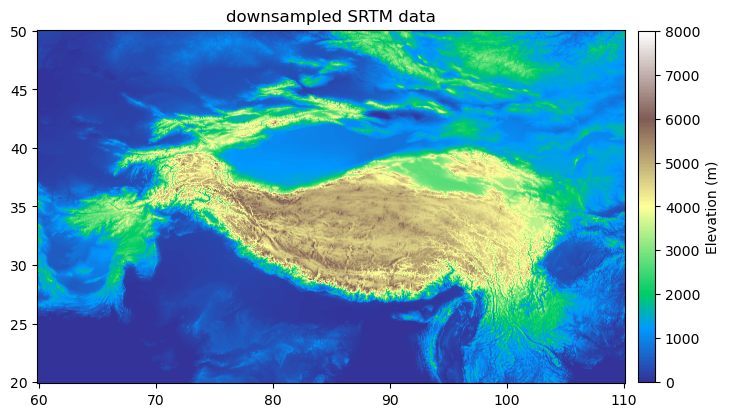

In [20]:
## Check
srtm_down = readTiff(path_srtm_down)
cmap = plt.cm.terrain
plt.figure(figsize=(8, 7))
plt.subplot(1,1,1)
plt.title('downsampled SRTM data')
plt.imshow(srtm_down.array, cmap=cmap, clim=[0, 8000], alpha=1, extent=srtm_down.geoextent)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)', shrink=0.65)



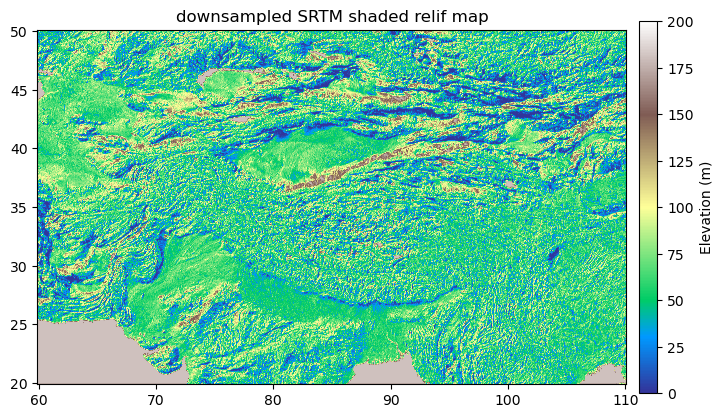

In [18]:
## check shade relif map
srtm_down_shade_relif = readTiff(path_dem_shade_relif)
cmap = plt.cm.terrain
plt.figure(figsize=(8, 7))
plt.subplot(1,1,1)
plt.title('downsampled SRTM shaded relif map')
plt.imshow(srtm_down_shade_relif.array, cmap=cmap, \
                  clim=[0, 200], alpha=1, extent=srtm_down_shade_relif.geoextent)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')
